In [1]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import cv2

# 데이터 로드 함수
def load_images(image_dir, target_size=(64, 64)):
    images = []
    file_names = sorted(os.listdir(image_dir))  # 정렬하여 파일 순서를 맞춤
    for file_name in file_names:
        if file_name.endswith(".png"):
            img = cv2.imread(os.path.join(image_dir, file_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)  # 크기 조정
            images.append(img)
    return np.array(images)

input_path = "/Users/kimeunsur/2024winter/4주차/font_images/nanumgothic"
target_path = "/Users/kimeunsur/2024winter/4주차/font_images/font_dataset"
import os

# 파일 경로 확인
print("Input path exists:", os.path.exists(input_path))
print("Target path exists:", os.path.exists(target_path))

# 파일 목록 확인
print("Files in input path:", os.listdir(input_path))
print("Files in target path:", os.listdir(target_path))
# 입력(고딕체) 데이터와 타겟 데이터 로드
X_gothic = load_images(input_path)  # 고딕체 이미지
Y_target = load_images(target_path)  # 타겟 스타일 이미지

# 데이터 정규화 (픽셀 값을 [0, 1]로 스케일링)
X_gothic = X_gothic / 255.0
Y_target = Y_target / 255.0

# 차원 추가 (64x64 -> 64x64x1)
X_gothic = np.expand_dims(X_gothic, axis=-1)
Y_target = np.expand_dims(Y_target, axis=-1)

Input path exists: True
Target path exists: True
Files in input path: ['쾴.png', '펥.png', '꿝.png', '쬚.png', '쬏.png', '믑.png', '뭹.png', '풷.png', '좶.png', '췏.png', '훲.png', '앤.png', '귯.png', '긏.png', '룡.png', '뢸.png', '뤑.png', '쟷.png', '놖.png', '눞.png', '틾.png', '빌.png', '겼.png', '첄.png', '광.png', '샪.png', '천.png', '뉥.png', '뉼.png', '곩.png', '퉍.png', '샟.png', '뤹.png', '겎.png', '쥋.png', '방.png', '촊.png', '쵏.png', '쳲.png', '훈.png', '롷.png', '뇄.png', '잩.png', '녈.png', '췰.png', '햤.png', '뀥.png', '둸.png', '쨌.png', '뮒.png', '퓱.png', '퓐.png', '픑.png', '풸.png', '둠.png', '쨕.png', '뉘.png', '떂.png', '쭐.png', '쐛.png', '삪.png', '뗯.png', '컂.png', '뫡.png', '폒.png', '폧.png', '멜.png', '펃.png', '쓍.png', '멧.png', '쿱.png', '멚.png', '꼩.png', '쁅.png', '퓣.png', '쎔.png', '똠.png', '썼.png', '뙉.png', '줘.png', '츓.png', '젦.png', '훳.png', '앐.png', '뢵.png', '롵.png', '쇯.png', '숚.png', '겡.png', '결.png', '택.png', '밖.png', '챁.png', '늈.png', '쳠.png', '뉈.png', '뤻.png', '힕.png', '샞.png', '툚.png', '텦.png', '걢.png', '읕.png', '쵎

In [2]:
from tensorflow.keras import layers  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model 

# 스타일 정보 생성
num_samples = len(X_gothic)  # 데이터 샘플 수
num_styles = 5  # 예: 5개의 스타일
style_labels = np.random.randint(0, num_styles, size=(num_samples,))  # 랜덤 스타일 레이블
style_one_hot = to_categorical(style_labels, num_classes=num_styles)  # 원-핫 인코딩

# 모델 정의
input_img = layers.Input(shape=(64, 64, 1))  # 이미지 입력
style_input = layers.Input(shape=(num_styles,))  # 스타일 정보 입력

# Encoder
x = layers.Conv2D(20, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2))(x) #이미지 크기 절반으로 64->32
x = layers.Conv2D(40, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2))(x) #크기 32->16

# Style Embedding
style_embedding = layers.Dense(128, activation='relu')(style_input)

# Decoder
x = layers.Conv2DTranspose(40, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x) #16->32
x = layers.Conv2DTranspose(20, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) #32->64
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

2025-01-19 14:56:58.912079: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-01-19 14:56:58.912123: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-01-19 14:56:58.912127: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-01-19 14:56:58.912316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-19 14:56:58.912329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# 모델 생성
model = Model([input_img, style_input], decoded)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# 모델 학습
history = model.fit(
    [X_gothic, style_one_hot],  # 입력: 고딕체 이미지와 스타일 정보
    Y_target,                   # 출력: 타겟 폰트 이미지
    validation_split=0.2,       # 검증 데이터 비율
    epochs=50,                  # 학습 반복 횟수
    batch_size=32               # 배치 크기
)

Epoch 1/50


/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(
2025-01-19 14:57:03.624046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 430ms/step - accuracy: 0.7144 - loss: 0.1895 - val_accuracy: 0.8578 - val_loss: 0.1224
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.8523 - loss: 0.1266 - val_accuracy: 0.8578 - val_loss: 0.1210
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.8540 - loss: 0.1244 - val_accuracy: 0.8578 - val_loss: 0.1209
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.8553 - loss: 0.1225 - val_accuracy: 0.8578 - val_loss: 0.1209
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.8563 - loss: 0.1218 - val_accuracy: 0.8578 - val_loss: 0.1209
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.8558 - loss: 0.1227 - val_accuracy: 0.8578 - val_loss: 0.1209
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.8560 - loss: 0.1219 - val_accuracy: 0.8578 - val_loss: 0.1209
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.8559 - loss: 0.1224 - val_accuracy: 0.857

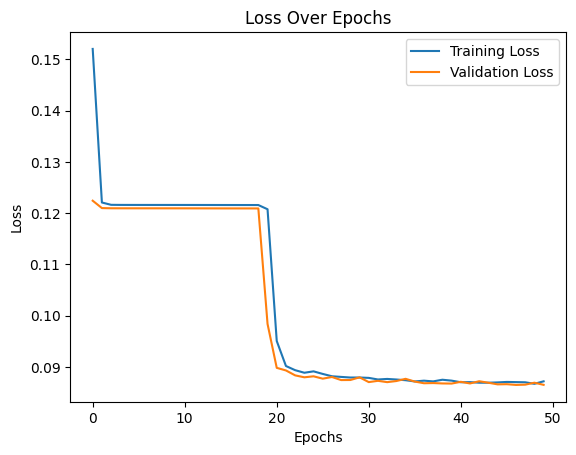

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

이제 전이학습일 시켜봅세다. transfer learning

In [6]:
encoder_input = model.input[0]
style_input = model.input[1]
encoded = model.get_layer("max_pooling2d_1").output  # 인코더 마지막 출력

from tensorflow.keras import layers, Model

x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Fine-Tuning 모델 생성
fine_tuned_model = Model([encoder_input, style_input], decoded)
fine_tuned_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [7]:
import os
import cv2
import numpy as np

# 데이터 로드 함수
def load_handwritten_images(image_dir, target_size=(64, 64)):
    images = []
    labels = []
    file_names = sorted(os.listdir(image_dir))
    for file_name in file_names:
        if file_name.endswith(".jpg"):
            try:
                img_path = os.path.join(image_dir, file_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Unable to read {img_path}")
                    continue
                img = cv2.resize(img, target_size) / 255.0  # 픽셀 정규화
                images.append(img)
                label = os.path.splitext(file_name)[0]  # splittext 오타 수정
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
    # NumPy 배열 변환 및 채널 차원 추가
    images_array = np.expand_dims(np.array(images), axis=-1)
    return images_array, labels

# 손글씨 데이터 경로
handwritten_path = "/Users/kimeunsur/2024winter/4주차/font_images/seungmin_hw"

# 손글씨 데이터 로드
X_handwritten, handwritten_labels = load_handwritten_images(handwritten_path)
print(f"Handwritten data shape: {X_handwritten.shape}")
print(f"Number of labels: {len(handwritten_labels)}")


Handwritten data shape: (200, 64, 64, 1)
Number of labels: 200


In [ ]:
# 원-핫 인코딩된 스타일 정보 생성 (단일 손글씨 스타일로 가정)
from tensorflow.keras.utils import to_categorical

style_label = 0  # 손글씨 스타일 번호
style_labels = np.full((len(X_handwritten),), style_label)
style_one_hot = to_categorical(style_labels, num_classes=1)  # 단일 클래스

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X_handwritten, test_size=0.2, random_state=42)

# 모델 학습
history = fine_tuned_model.fit(
    [X_train, style_one_hot[:len(X_train)]],  # 입력: 이미지와 스타일
    X_train,                                 # 출력: 재구성된 이미지
    validation_data=([X_val, style_one_hot[len(X_train):]], X_val),
    epochs=50,
    batch_size=16
)


Epoch 1/50


/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.9191 - loss: 0.1064 - val_accuracy: 0.9489 - val_loss: 0.0364
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9482 - loss: 0.0369 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9474 - loss: 0.0374 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.9467 - loss: 0.0380 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9474 - loss: 0.0372 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9479 - loss: 0.0371 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9471 - loss: 0.0377 - val_accuracy: 0.9489 - val_loss: 0.0362
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9479 - loss: 0.0370 - val_accuracy: 0.9489 - val_